In [12]:
from helpers import stats, weapon_types, prof_translator, item_translator, proffesions
from pprint import pprint
import pandas as pd
import ast

# Stats to be mined from item database along with their types

stats = {
    'legendary_bonus' : 'object',
    'attack_speed' : 'int',
    'armor' : 'int',
    'all_features' : 'int',
    'strength' : 'int',
    'agility' : 'int',
    'intellect' : 'int',
}

# Item extractor for choosen stats, returns dataframe

def extractItemStats(stats : dict):
    armor_dfs = {}
    for key, val in proffesions.items():
        df = pd.read_csv(f'items/legendary/{val}_Zbroje.csv')
        item_stats = list(df['stats'])
        df = df.drop(columns=['prof', 'type', 'stats'])
        stores = {k: [] for k in stats.keys()}
        for el in item_stats:
            # Convert string into a dictionary using ast (Abstract Syntax Tree)
            single_item_stats = ast.literal_eval(el)
            for i in stats.keys():
                try: 
                    stores[i].append(single_item_stats[i])
                except KeyError:
                    stores[i].append('0')
        #print(stores)
        for i, dt in stats.items():
            df[i] = stores[i]
            df[i] = df[i].astype(dt)
        armor_dfs[key] = df
    return armor_dfs

In [25]:
armor_dfs = extractItemStats(stats)
armor_dfs['t'].head(10)
#armor_dfs['t'].dtypes

,lvl,name,legendary_bonus,attack_speed,armor,all_features,strength,agility,intellect
0,35,Zwiewna peleryna herosa,"curse,35",34,149,26,0,0,0
1,35,Dawna zwiewna peleryna herosa,"curse,35",34,134,26,0,0,0
2,36,Żarłoczny pancerz Mamlambo,"dmgred,36",26,155,26,0,0,0
3,40,Peleryna żywych konarów,"curse,40",58,139,18,0,0,0
4,40,Nocny strój kostuchy,"holytouch,40",58,122,18,0,0,0
5,58,Narzuta karmazynowej zagłady,"curse,58",67,179,23,0,36,0
6,58,Peleryna czarnego zaklinacza,"holytouch,58",67,179,23,0,36,0
7,61,Magiczna szata Złego Przewodnika,"glare,61",39,203,23,0,0,0
8,70,Kaftan błogosławionych grotów,"lastheal,70",79,266,26,0,0,0
9,70,Kaftan wędrownego samotnika,"holytouch,70",79,266,26,0,0,0


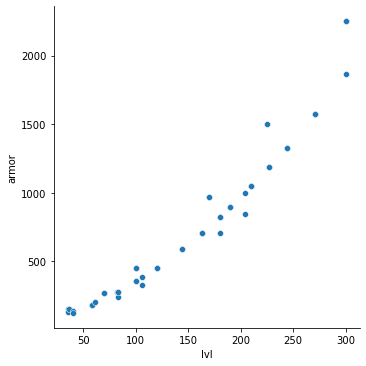

In [28]:
import seaborn as sns

tracker_df = armor_dfs['t']

# Getting rid of lvl after comma in leg. bon. column
tracker_df['legendary_bonus'] = tracker_df['legendary_bonus'].apply(lambda x: x.split(',')[0]).astype('str')

sns.relplot(data=tracker_df, x='lvl', y='armor')

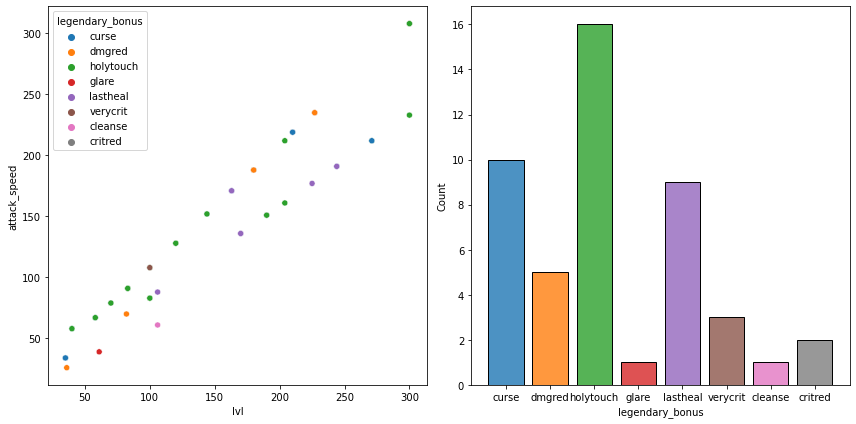

In [43]:
import matplotlib.pyplot as plt

f, axs = plt.subplots(1, 2, figsize=(12, 6))
sns.scatterplot(data=tracker_df, x="lvl", y="attack_speed", hue="legendary_bonus", ax=axs[0])
sns.histplot(data=tracker_df, x="legendary_bonus", hue="legendary_bonus", shrink=.8, alpha=.8, legend=False, ax=axs[1])
f.tight_layout()